# Creating and plotting a rainflow matrix with fatpack and matplotlib

This notebook demonstrates how various rainflow matrices can be established with fatpack and the plotting library matplotlib.

In [1]:
import fatpack
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)
print(fatpack.__version__)

0.6.3


## Mean vs range rainflow matrix

First we generate a signal for the example and extract the rainflow cycles and corresponding means. 

In [2]:
y = np.random.normal(size=100000)*10.

S, Sm = fatpack.find_rainflow_ranges(y, return_means=True, k=256)

then create the bins to sort the range and mean values into. 

In [3]:
rowbin = np.linspace(-25, 25, 50)
colbin = np.linspace(0, 85, 50)

finally we create a data array which is contains the mean values in the first column adn the range values in the second and extract the rainflow matrix. The mean-range rainflow matrix is then plotted with matplotlib.

Text(0, 0.5, 'Range')

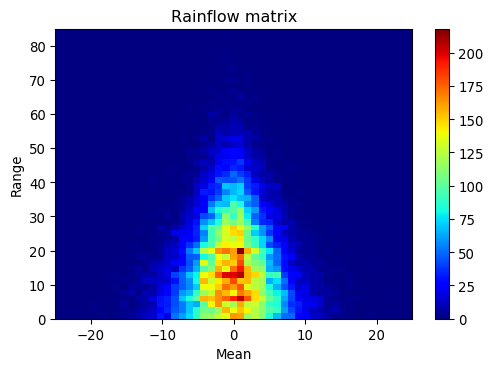

In [4]:
data_arr = np.array([Sm, S]).T
rfcmat = fatpack.find_rainflow_matrix(data_arr, rowbin, colbin)

X, Y = np.meshgrid(rowbin, colbin, indexing='ij')
plt.figure(dpi=96)
C = plt.pcolormesh(X, Y, rfcmat, cmap='jet')
plt.colorbar(C)
plt.title("Rainflow matrix")
plt.xlabel("Mean")
plt.ylabel("Range")

## Start vs destination level rainflow matrix

For this rainflow matrix we must extract the cycles directly such that the start and destination point is known, we therefore begin by extracting all cycles from y.

In [5]:
rev, ix = fatpack.find_reversals(y, k=256)
cyc1, res = fatpack.find_rainflow_cycles(rev)
rev_res = fatpack.concatenate_reversals(res, res)
cyc_res, _ = fatpack.find_rainflow_cycles(rev_res)
cycles = np.concatenate((cyc1, cyc_res))

we then create bins, in this case the range (min-max) the starting level and the destination level are the same and row and column bins are the same. Finish off by plotting the result with matplotlib.

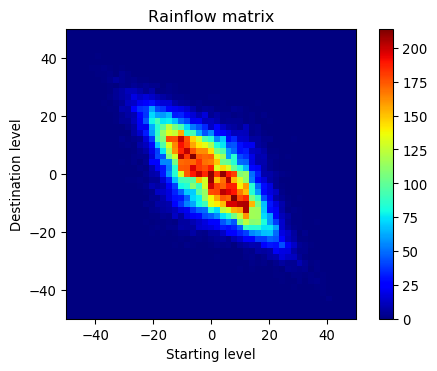

In [6]:
bins = np.linspace(-50, 50, 50)
rfcmat = fatpack.find_rainflow_matrix(cycles, bins, bins)

X, Y = np.meshgrid(bins, bins, indexing='ij')
plt.figure(dpi=96)
C = plt.pcolormesh(X, Y, rfcmat, cmap='jet')
plt.colorbar(C)
plt.title("Rainflow matrix")
plt.xlabel("Starting level")
plt.ylabel("Destination level")
plt.gca().set_aspect('equal')